In [117]:
# Introducing library 导入项目所依赖的第三方代码库
# library(tidyverse) # 是一个包含各种与数据科学项目相关的第三方库的综合库
library(dplyr) # 用于数据变换、数据清理
library(caret) # 用于机器学习建模
library(ggplot2) # 用于绘图
library(stringr) # 用于字符串数据处理
library("class")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [309]:
raw_data <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  track_id = col_character(),
  track_name = col_character(),
  track_artist = col_character(),
  track_album_id = col_character(),
  track_album_name = col_character(),
  track_album_release_date = col_character(),
  playlist_name = col_character(),
  playlist_id = col_character(),
  playlist_genre = col_character(),
  playlist_subgenre = col_character()
)
See spec(...) for full column specifications.


In [310]:
summary(raw_data)
# for (col in names(raw_data)) {
#     print(paste(col,":", typeof(col)))
# }
# print(table(raw_data$playlist_genre))
# print(table(raw_data$playlist_subgenre))

   track_id          track_name        track_artist       track_popularity
 Length:32833       Length:32833       Length:32833       Min.   :  0.00  
 Class :character   Class :character   Class :character   1st Qu.: 24.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 45.00  
                                                          Mean   : 42.48  
                                                          3rd Qu.: 62.00  
                                                          Max.   :100.00  
 track_album_id     track_album_name   track_album_release_date
 Length:32833       Length:32833       Length:32833            
 Class :character   Class :character   Class :character        
 Mode  :character   Mode  :character   Mode  :character        
                                                               
                                                               
                                                               
 playlist_name      playlis

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

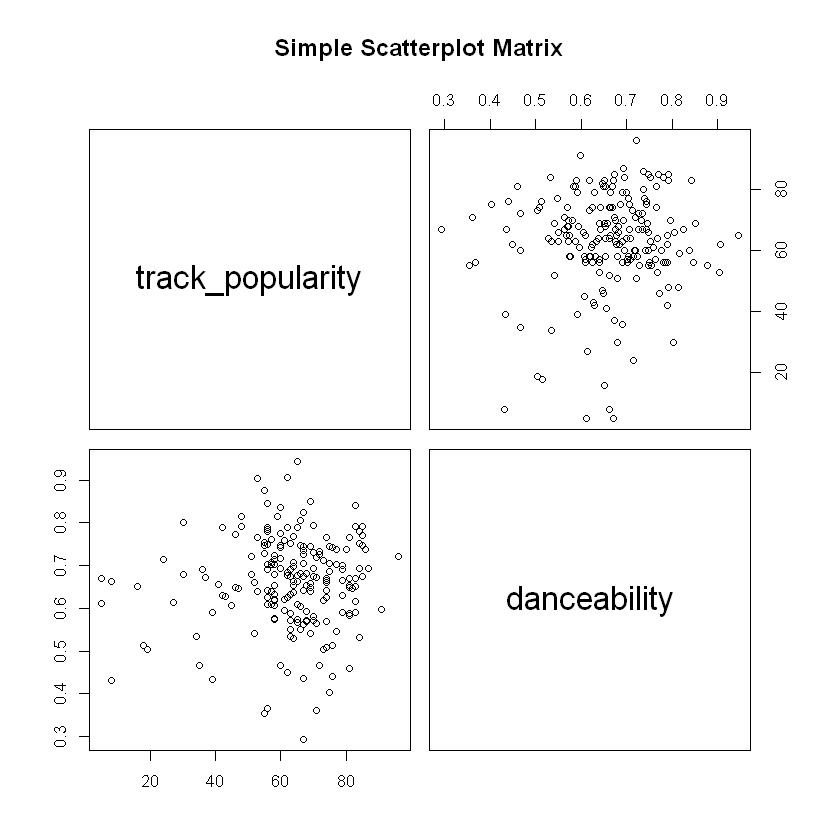

In [311]:
# EDA 数据探索分析

pairs(~track_popularity+danceability,data=raw_data[sample(200), c('track_popularity', 'danceability')],
   main="Simple Scatterplot Matrix")

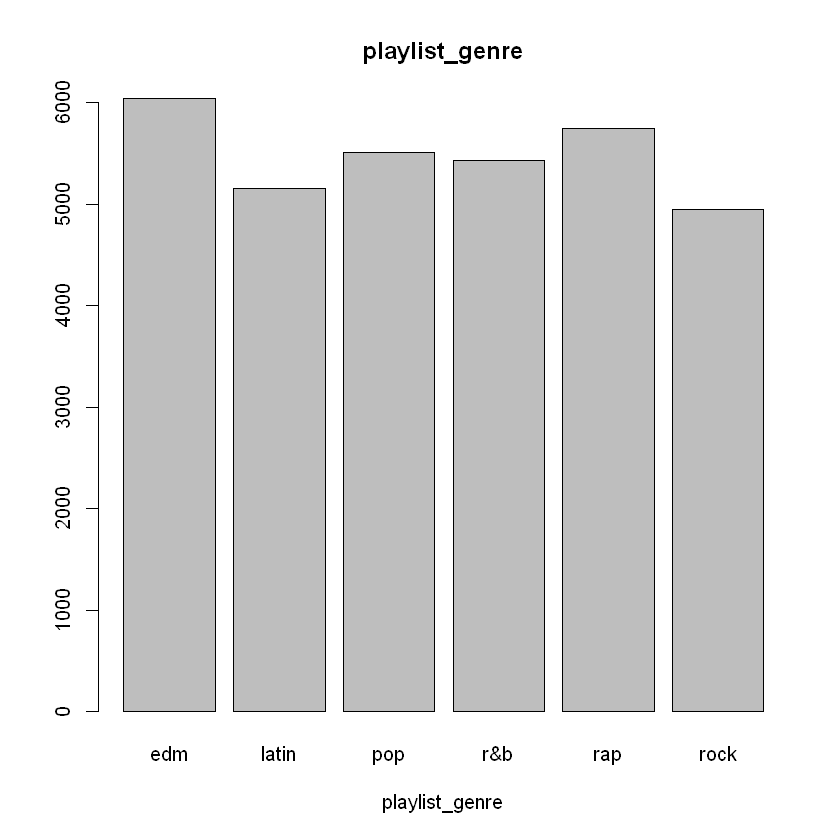

In [312]:
barplot(table(raw_data[, "playlist_genre"]), main="playlist_genre", xlab="playlist_genre")

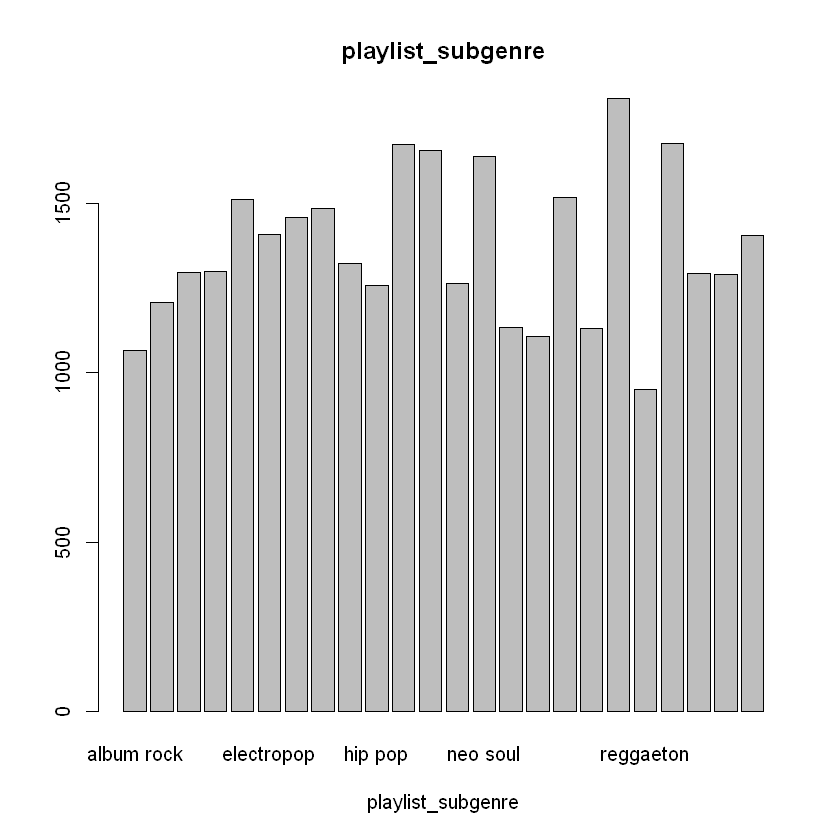

In [313]:
barplot(table(raw_data[, "playlist_subgenre"]), main="playlist_subgenre", xlab="playlist_subgenre")

In [71]:
# Remove rows with empty value
raw_data_rmna <- na.omit(raw_data)
print(paste("Remove rows with empty value:", nrow(raw_data) - nrow(raw_data_rmna)))
# Remove rows with duplicated track Id
raw_data_rmdup <- raw_data_rmna[!duplicated(raw_data_rmna[, c("track_id", "track_name")]),]
print(paste("Remove rows with duplicated track ID:", nrow(raw_data_rmna) - nrow(raw_data_rmdup)))

[1] "Remove rows with empty value: 5"
[1] "Remove rows with duplicated track ID: 4476"


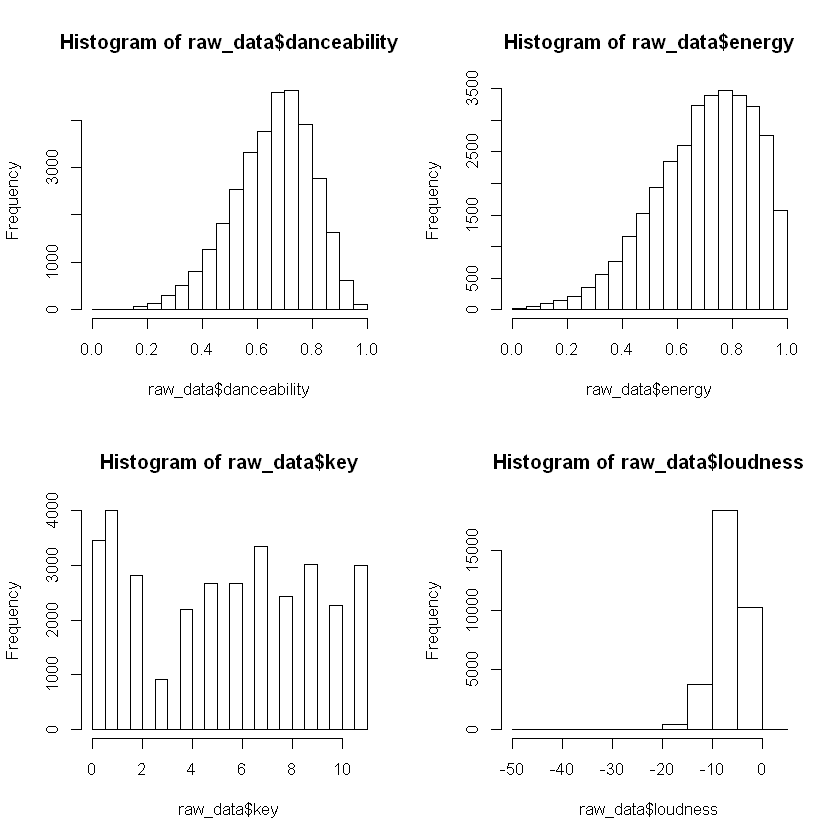

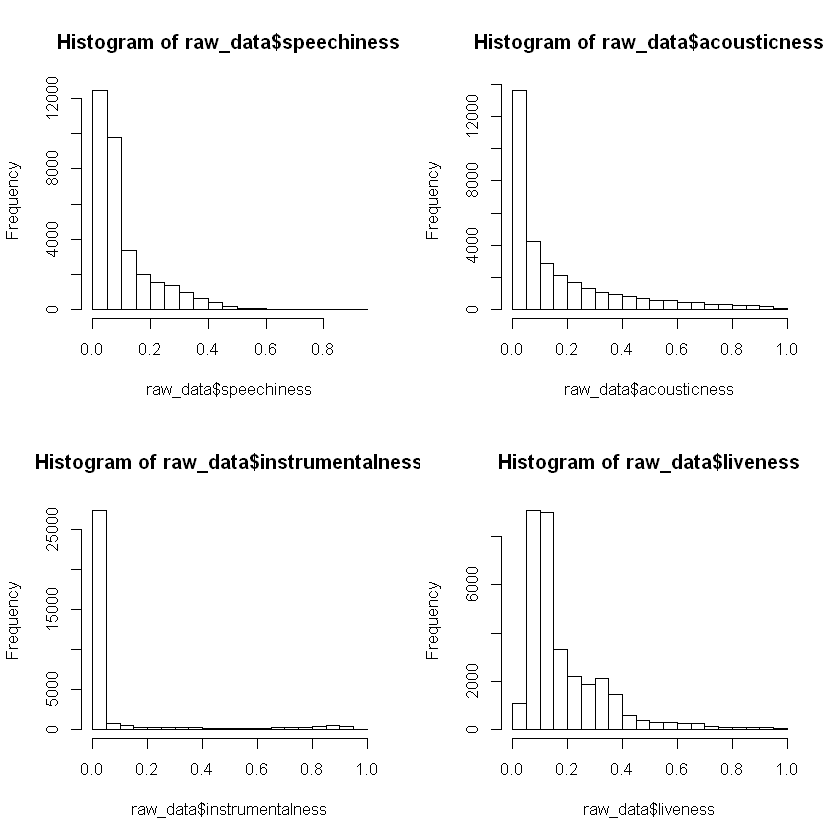

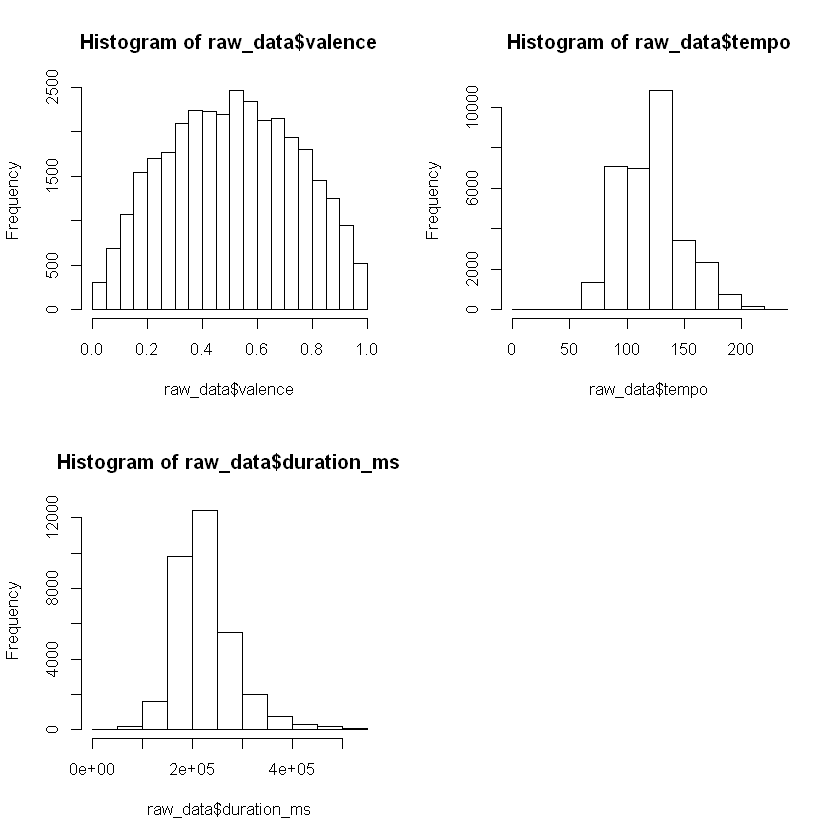

In [290]:
# Observe the data distribution, find skewness
par(mfrow = c(2, 2))
hist(raw_data$danceability)
hist(raw_data$energy)
hist(raw_data$key)
hist(raw_data$loudness)
hist(raw_data$speechiness)
hist(raw_data$acousticness)
hist(raw_data$instrumentalness)
hist(raw_data$liveness)
hist(raw_data$valence)
hist(raw_data$tempo)
hist(raw_data$duration_ms)

In [141]:
# Normalize data
raw_data_norm <- raw_data_rmdup
process <- preProcess(raw_data_norm, method=c("range"))
raw_data_norm <- predict(process, raw_data_norm)

In [291]:
# Down sampling
# copy the dataset schema to a temporary dataframe
dataset <- raw_data_norm[0,]
for (subgenre in unique(raw_data_norm$playlist_subgenre)) {
    # for each sub data of differernt subgenre
    tmdf <- raw_data_norm[raw_data_norm$playlist_subgenre == subgenre,] 
    # sample part of the data
    tmdf <- tmdf[sample(nrow(tmdf), size=100, replace=FALSE),]
    # combine it by rows to a new dataset
    dataset <- rbind(dataset, tmdf)
}
print(paste("Number of rows in the new dataframe", nrow(dataset)))

[1] "Number of rows in the new dataframe 2400"


In [143]:
summary(dataset)

   track_id          track_name        track_artist       track_popularity
 Length:2400        Length:2400        Length:2400        Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.2075  
 Mode  :character   Mode  :character   Mode  :character   Median :0.4300  
                                                          Mean   :0.3929  
                                                          3rd Qu.:0.5800  
                                                          Max.   :0.9500  
 track_album_id     track_album_name   track_album_release_date
 Length:2400        Length:2400        Length:2400             
 Class :character   Class :character   Class :character        
 Mode  :character   Mode  :character   Mode  :character        
                                                               
                                                               
                                                               
 playlist_name      playlis

In [149]:
# Dummy
# head(model.matrix(~playlist_genre-1,data=raw_data))

In [292]:
# determine columns
summary(dataset)
names(raw_data)
id_cols = c('track_id','track_name')
category_cols = c('track_artist', 
                  'playlist_name', 'playlist_id', 
                  'track_album_id', 'track_album_name', 
                  'track_album_release_date')
numeric_cols = c('track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms')
label_cols = c('playlist_genre', 'playlist_subgenre')

   track_id          track_name        track_artist       track_popularity
 Length:2400        Length:2400        Length:2400        Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.2100  
 Mode  :character   Mode  :character   Mode  :character   Median :0.4300  
                                                          Mean   :0.3931  
                                                          3rd Qu.:0.5800  
                                                          Max.   :0.9500  
 track_album_id     track_album_name   track_album_release_date
 Length:2400        Length:2400        Length:2400             
 Class :character   Class :character   Class :character        
 Mode  :character   Mode  :character   Mode  :character        
                                                               
                                                               
                                                               
 playlist_name      playlis

[1] "track_id"                 "track_name"              
 [3] "track_artist"             "track_popularity"        
 [5] "track_album_id"           "track_album_name"        
 [7] "track_album_release_date" "playlist_name"           
 [9] "playlist_id"              "playlist_genre"          
[11] "playlist_subgenre"        "danceability"            
[13] "energy"                   "key"                     
[15] "loudness"                 "mode"                    
[17] "speechiness"              "acousticness"            
[19] "instrumentalness"         "liveness"                
[21] "valence"                  "tempo"                   
[23] "duration_ms"

In [186]:
# Split dataset
set.seed(2874934)
dataset$playlist_genre <- as.factor(dataset$playlist_genre)
ind <- sample(2, nrow(dataset), replace=TRUE, prob=c(0.8, 0.2))
trainset <- dataset[ind==1,]
testset <- dataset[ind==2,]

In [187]:
dim(trainX)
dim(trainY)
dim(testX)
dim(testY)
length(unique(testY)$playlist_genre)

[1] 1899   13

[1] 1899    1

[1] 501  13

[1] 501   1

[1] 6

#### KNN

In [284]:

label_cols
trainX <- trainset[, numeric_cols]
trainY <- trainset[,names(trainset)[names(trainset)=="playlist_genre"]]
testX <- testset[, numeric_cols]
testY <- testset[,names(testset)[names(testset)=="playlist_genre"]]
res <- knn(trainX, testX, cl=trainY, k=2)



[1] "playlist_genre"    "playlist_subgenre"

ERROR: Error in knn(trainX, testX, cl = trainY, k = 2): 'train' and 'class' have different lengths


#### LDA

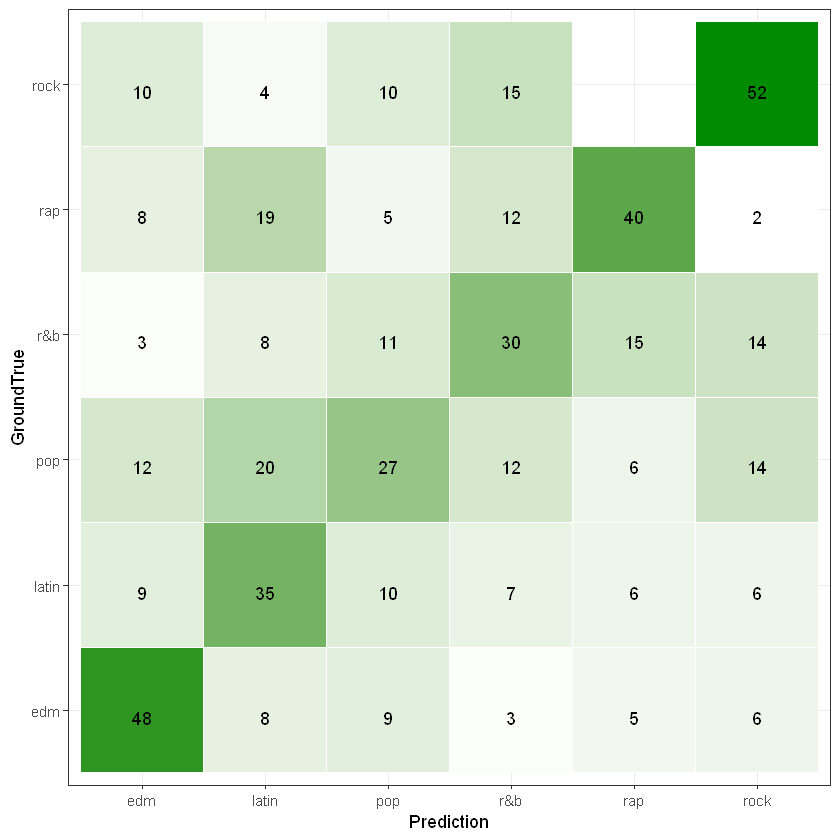

In [300]:
# https://www.r-bloggers.com/2021/05/linear-discriminant-analysis-in-r/
library(MASS)

# Fit the LDA model, return the classifier
linear <- lda(playlist_genre~., trainset[,c(numeric_cols, "playlist_genre")])


# Make prediction
pred <- predict(linear, testset[,c(numeric_cols, "playlist_genre")])
# ldahist(data=p$x[,1], g=trainset[,c(numeric_cols, "playlist_genre")]$playlist_genre)

# Aggregate predictions
res <- data.frame(pred$class, testY$playlist_genre)
names(res) <- c("Prediction", "GroundTrue")
res_stat <- res %>% group_by(Prediction, GroundTrue) %>% summarise(total_count=n())

# Plot confusion matrix
ggplot(data=res_stat, mapping=aes(x=Prediction, y=GroundTrue)) + 
    geom_tile(aes(fill = total_count), colour = "white") +
    geom_text(aes(label=sprintf("%1.00f", total_count)), vjust = 1) +
    scale_fill_gradient(low="white", high="green4") +
    theme_bw() + theme(legend.position = "none")

Warning message in roc.default(as.numeric(p$class), as.numeric(testY$playlist_genre)):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"


Call:
roc.default(response = as.numeric(p$class), predictor = as.numeric(testY$playlist_genre))

Data: as.numeric(testY$playlist_genre) in 90 controls (as.numeric(p$class) 1) < 94 cases (as.numeric(p$class) 2).
Area under the curve: 0.6664

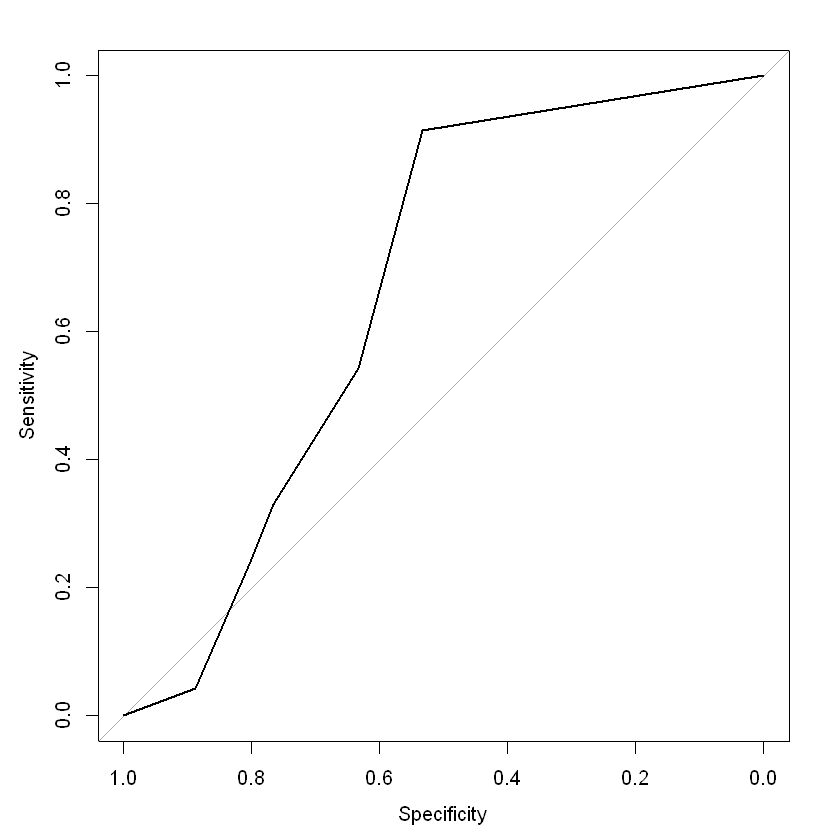

In [294]:
library(pROC)

# Evaluate ROC value
roc.playlist_genre <- roc(as.numeric(p$class), as.numeric(testY$playlist_genre))
# par(mfrow = c(2, 2))
roc.playlist_genre
plot(roc.playlist_genre)

#### Random Forest

In [298]:
library(randomForest)
rf <- randomForest(playlist_genre~., data=trainset[,c(numeric_cols, "playlist_genre")], proximity=TRUE)
rf


Call:
 randomForest(formula = playlist_genre ~ ., data = trainset[,      c(numeric_cols, "playlist_genre")], proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 45.29%
Confusion matrix:
      edm latin pop r&b rap rock class.error
edm   216    29  29  15  15   17   0.3271028
latin  26   156  41  36  57   11   0.5229358
pop    39    58 101  37  27   47   0.6731392
r&b    14    44  19 146  65   31   0.5423197
rap    19    32  15  42 195   11   0.3789809
rock   16    11  19  33   5  225   0.2718447

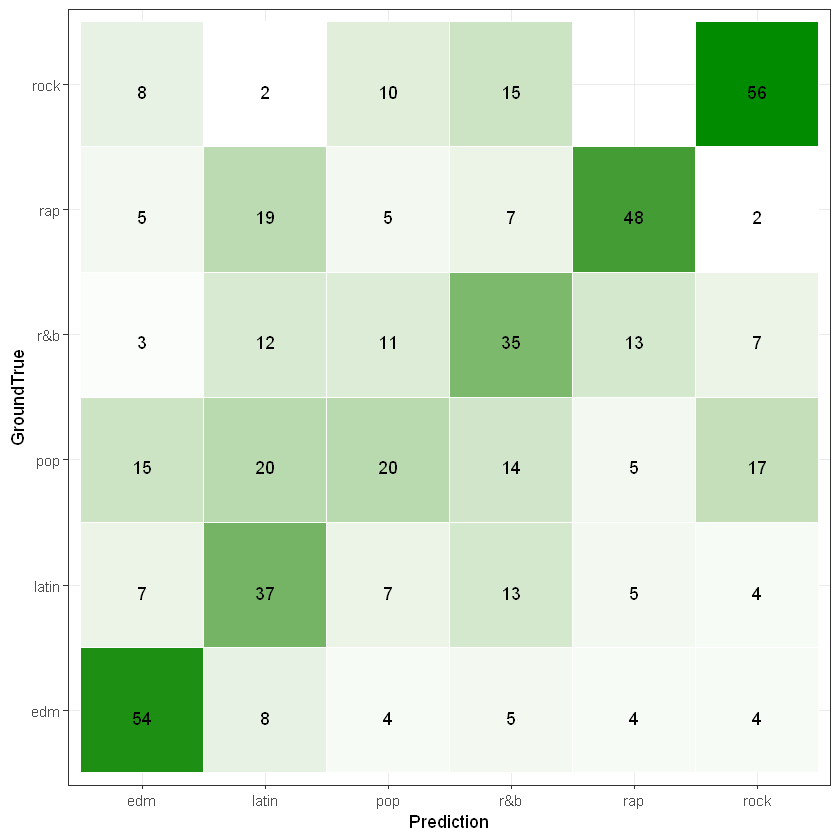

In [305]:
pred <- predict(rf, testset[,c(numeric_cols, "playlist_genre")])
pred <- data.frame(pred)
names(pred) = c("class")
# Aggregate predictions
res <- data.frame(pred$class, testY$playlist_genre)
names(res) <- c("Prediction", "GroundTrue")
res_stat <- res %>% group_by(Prediction, GroundTrue) %>% summarise(total_count=n())

# Plot confusion matrix
ggplot(data=res_stat, mapping=aes(x=Prediction, y=GroundTrue)) + 
    geom_tile(aes(fill = total_count), colour = "white") +
    geom_text(aes(label=sprintf("%1.00f", total_count)), vjust = 1) +
    scale_fill_gradient(low="white", high="green4") +
    theme_bw() + theme(legend.position = "none")

Warning message in roc.default(as.numeric(pred$class), as.numeric(testY$playlist_genre)):
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"


Call:
roc.default(response = as.numeric(pred$class), predictor = as.numeric(testY$playlist_genre))

Data: as.numeric(testY$playlist_genre) in 92 controls (as.numeric(pred$class) 1) < 98 cases (as.numeric(pred$class) 2).
Area under the curve: 0.7063

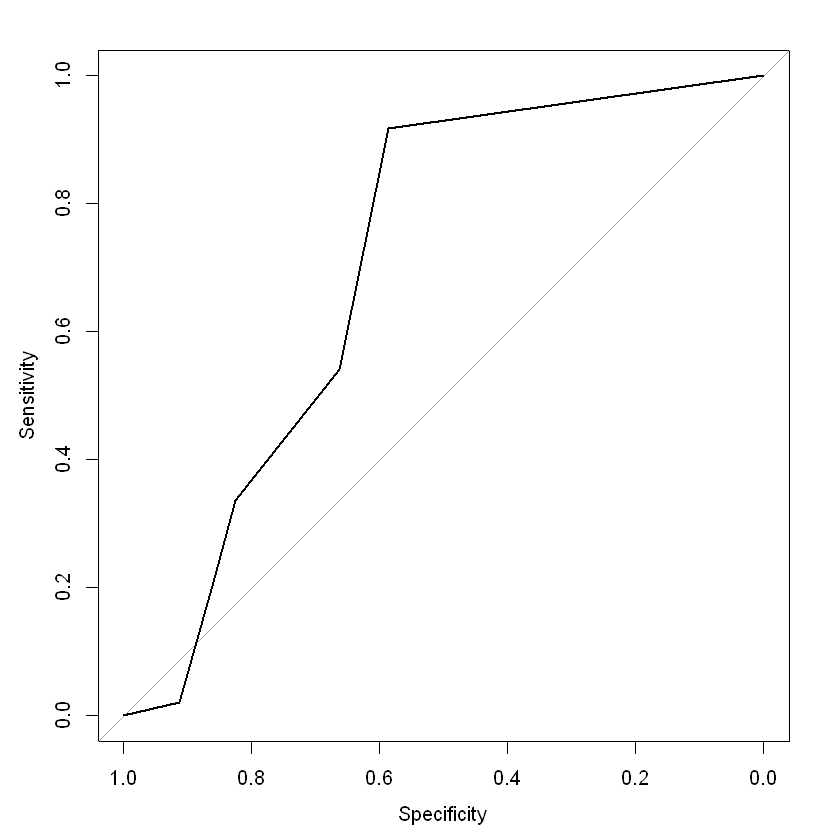

In [307]:
# Evaluate ROC value
roc.playlist_genre <- roc(as.numeric(pred$class), as.numeric(testY$playlist_genre))
# par(mfrow = c(2, 2))
roc.playlist_genre
plot(roc.playlist_genre)

In [ ]:
# Data preprocessing 数据预处理（数据清洗）

# 1. 确定列数据类型

# 2. 处理缺失值

# 3. 处理噪音数据 outlier

# 4. 处理重复记录
# raw_data[!duplicated(raw_data),]

In [ ]:
# Data Transformation 数据转换

# 1. 类别数据离散化 data dumming （比如字符串类别数据按类别转换成 0-1 特征向量

# 2. 特征选择（ID等唯一性的特征可以省略掉）

# 3. 数据规范化、归一化 （改变数据的分布，便于加速求解收敛）


In [289]:
# print(table(raw_data$playlist_genre))
# print(length(category_cols))
# cols = 2
# rows = length(category_cols)/2

# par(mfrow = c(5, 1))
# for (i in category_cols[1:length(category_cols)]) {
#     barplot(
#         table(raw_data[, i]), 
#         main=i, 
#         xlab=i)
# }